In [7]:
import json
import os
import glob
from collections import defaultdict

dataset = "amc23"

In [8]:
results_dir = "/home/stoshniwal/Research/llm/experiments/cs234/eval{}/eval-results/" + dataset
eval_mode = ["short", "medium", "long", ""]

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-7B")

mode_to_length = defaultdict(list)

for mode in eval_mode:
    if mode == "":
        mode_results_dir = results_dir.format("")
    else:
        mode_results_dir = results_dir.format("-" + mode)
    for file in glob.glob(os.path.join(mode_results_dir, "output.jsonl")):
        with open(file, "r") as f:
            for line in f:
                data = json.loads(line)
                if data["predicted_answer"] is None:
                    continue
                solution_length = len(tokenizer.tokenize(data["generation"]))
                mode_to_length[mode].append(solution_length)

for mode, lengths in mode_to_length.items():
    print(f"{mode}: {sum(lengths) / len(lengths):.2f}")


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

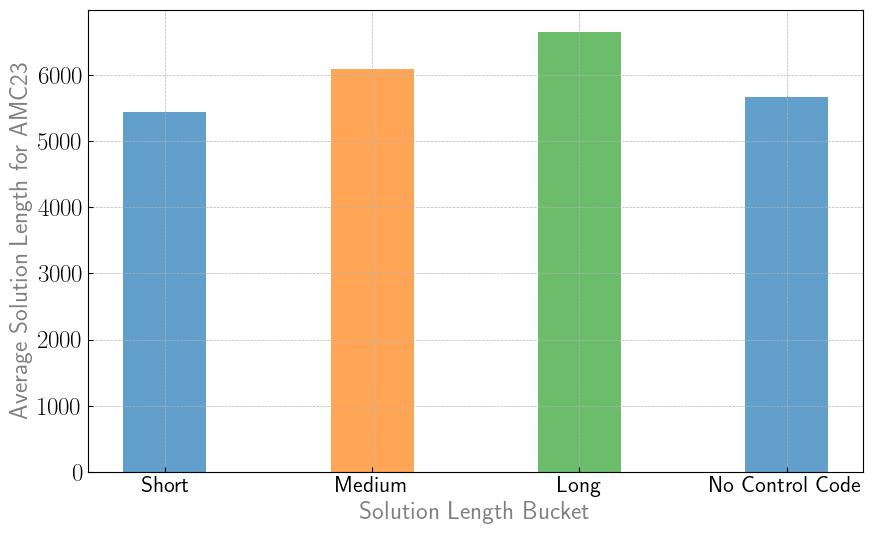

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Set Matplotlib Parameters
plt.style.use('bmh')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k', labelsize=18)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 18

data_lens = [
    # ("Short", 6500.89),
    # ("Medium", 6467.26),
    # ("Long", 7022.92),
    ("Short", 5436.46),
    ("Medium", 6088.04),
    ("Long", 6655.86),
    ("No Control Code", 5672.89),
]



plt.figure(figsize=(10, 6))
plt.bar(
    [bucket[0] for bucket in data_lens],
    [bucket[1] for bucket in data_lens],
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],
    alpha=0.7,
    width=0.4
)

plt.ylabel('Average Solution Length for AMC23', color='gray')
plt.xlabel('Solution Length Bucket', color='gray')

plt.savefig(f"../outputs/soln_len_{dataset}.png", dpi=300, bbox_inches='tight')